In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

/var/folders/wc/dg5vr0h57jvg48dksgcxz02w0000gn/T/ipykernel_27387/3454884829.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/processed/properties_cleaned_V2.csv")
df.head(5)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,the lions cghs,flat,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up...,4,4,3+,...,2400.0,2000.0,1800.0,0,1,0,0,1,2,92
1,bestech park view residency,flat,sector 2,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,...,1565.0,NaN,NaN,0,0,0,1,0,0,75
2,bptp freedom park life,flat,sector 57,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,...,NaN,5010.0,NaN,1,1,0,0,0,2,120
3,ss the leaf,flat,sector 85,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up...,2,2,3,...,1741.0,1730.0,1720.0,0,0,0,0,0,0,35
4,vatika city homes,flat,sector 83,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,...,1740.0,NaN,1225.0,0,1,0,0,0,2,81


In [3]:
df.shape

(3803, 23)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(3677, 23)

PRICE COLUMN

<Axes: xlabel='price', ylabel='Density'>

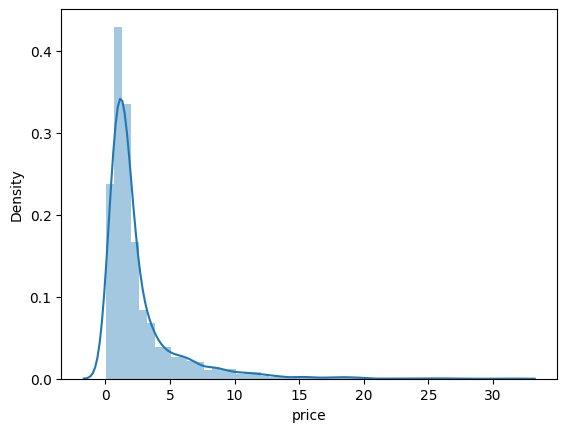

In [6]:
# CHECKING THE DISTRIBUTION 
sns.distplot(df["price"])

Not a normal distribution and clearly right scaled. So we now plot a boxplot to plot the IQR and the outliers.

<Axes: >

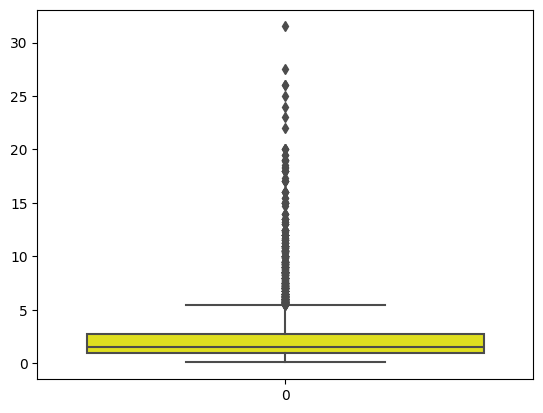

In [7]:
sns.boxplot(df["price"], color="yellow")

THe boxplot is very compressed and there is present of a large number of outliers above the top whiskers. 

In [8]:
df["price"].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [9]:
# LETS CALCULATE THE IQR AND I DENTIFY THE OUTLIERS
# count    3660.000000
# mean        2.533664
# std         2.980623
# min         0.070000
# 25%         0.950000
# 50%         1.520000
# 75%         2.750000
# max        31.500000

Q1 = 0.95
Q3 = 2.75

IQR = Q3 - Q1
print(f"{IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound is {round(lower_bound, 2)}")
print(f"Upper bound is {upper_bound}")

1.8
Lower bound is -1.75
Upper bound is 5.45


In [10]:
# OUTLIER DETECTION
outlier = df[(df["price"] > upper_bound) | (df["price"] < lower_bound)]
outlier["price"].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [11]:
outlier.sort_values("price", ascending=True).head(10)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
493,ansal api esencia,house,sector 67,5.46,24170.0,2259.00,Plot area 251(209.87 sq.m.),4,5,3+,...,NaN,2259.00,NaN,0,1,1,1,0,2,82
1333,experion windchants,flat,sector 112,5.49,11584.0,4739.30,Super Built up area 4739(440.27 sq.m.)Built Up...,4,5,3+,...,4739.0,3655.35,NaN,1,0,0,0,0,2,130
525,dlf city phase 1,house,sector 26,5.50,30556.0,1799.97,Plot area 200(167.23 sq.m.),4,4,3,...,NaN,1800.00,NaN,1,1,0,1,0,0,64
606,independent,house,sector 43,5.50,28424.0,1934.98,Plot area 215(179.77 sq.m.),1,1,0,...,NaN,1935.00,NaN,0,0,0,0,1,0,7
869,independent,house,sector 48,5.50,23504.0,2340.03,Plot area 260(217.39 sq.m.),4,4,2,...,NaN,2340.00,NaN,1,0,0,0,0,2,22
930,dlf city phase 1,house,sector 26,5.50,30556.0,1799.97,Plot area 200(167.23 sq.m.),4,4,3+,...,NaN,1800.00,NaN,0,1,1,0,0,0,35
973,cloudnine cottages,house,sohna road road,5.50,55000.0,1000.00,Plot area 1000(92.9 sq.m.),3,3,0,...,NaN,1000.00,NaN,0,0,0,0,0,0,0
1018,international city by sobha phase 1,house,sector 109,5.50,21605.0,2545.71,Plot area 270(225.75 sq.m.),4,4,3+,...,NaN,NaN,NaN,1,0,0,0,0,0,53
1064,independent,house,sector 23,5.50,21825.0,2520.05,Plot area 280(234.12 sq.m.),8,8,2,...,NaN,2520.00,NaN,1,1,0,1,0,2,54
1106,independent,house,sector 46,5.50,23061.0,2384.98,Plot area 265(221.57 sq.m.),8,8,3+,...,NaN,2385.00,NaN,0,0,0,1,1,2,27


Based on the price column there are some genuine outliers, but some data descrepencies exists as well.

PRICE_PER_SQFT COLUMN

<Axes: xlabel='price_per_sqft', ylabel='Density'>

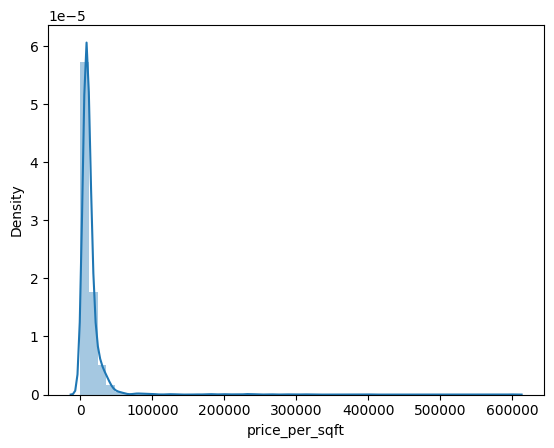

In [12]:
sns.distplot(df["price_per_sqft"])

<Axes: >

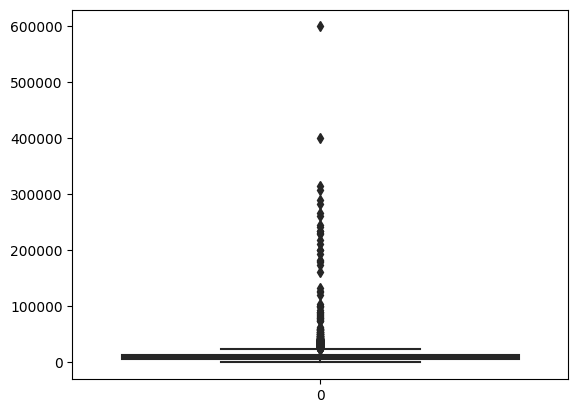

In [13]:
sns.boxplot(df["price_per_sqft"], color="green")

In [14]:
df["price_per_sqft"].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [15]:
# LETS CALCULATE THE IQR AND DENTIFY THE OUTLIERS
Q1_persqft = df["price_per_sqft"].quantile(0.25)
Q3_persqft = df["price_per_sqft"].quantile(0.75)

IQR_persqft = Q3_persqft - Q1_persqft
print(f"{IQR}")

lower_bound_persqft = Q1_persqft - 1.5 * IQR_persqft
upper_bound_persqft = Q3_persqft + 1.5 * IQR_persqft

print(f"Lower bound is {round(lower_bound_persqft, 2)}")
print(f"Upper bound is {upper_bound_persqft}")

1.8
Lower bound is -3777.62
Upper bound is 24475.375


In [16]:
# OUTLIER DETECTION
outlier_persqft = df[(df["price_per_sqft"] > upper_bound_persqft) | (df["price_per_sqft"] < lower_bound_persqft)]
outlier_persqft["price_per_sqft"].describe()

count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [17]:
outlier_persqft.sort_values("price", ascending=True).head(10)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
84,housing board colony,flat,sector 51,0.30,41666.0,72.0,Carpet area: 72 (6.69 sq.m.),1,1,No,...,NaN,NaN,72.0,0,0,0,1,0,0,15
235,independent,house,sector 105,0.38,76000.0,50.0,Carpet area: 50 (4.65 sq.m.),2,2,2,...,NaN,NaN,50.0,0,0,0,0,0,0,0
526,ss omnia,house,sector 86,0.42,84000.0,50.0,Plot area 50(4.65 sq.m.),5,3,2,...,NaN,50.0,NaN,0,0,0,0,0,0,0
1667,independent,house,sector 28,0.45,90000.0,50.0,Built Up area: 50 (4.65 sq.m.),5,3,0,...,NaN,50.0,NaN,0,0,0,0,0,0,0
2589,shree krishna homes,house,sector 104,0.48,50000.0,96.0,Plot area 80(7.43 sq.m.)Built Up area: 795 sq....,2,2,1,...,NaN,795.0,720.0,0,1,0,1,1,0,39
3652,independent,house,sector 105,0.50,50000.0,100.0,Built Up area: 100 (9.29 sq.m.),2,2,0,...,NaN,100.0,NaN,0,0,0,0,0,0,0
586,independent,house,sector 13,0.50,90909.0,55.0,Plot area 55(5.11 sq.m.),12,4,3,...,NaN,55.0,NaN,0,0,0,0,0,0,15
59,independent,house,sector 105,0.55,98214.0,56.0,Built Up area: 56 (5.2 sq.m.),4,4,0,...,NaN,56.0,NaN,0,0,0,0,0,0,0
3325,independent,house,sector 4,0.58,86567.0,67.0,Plot area 67(6.22 sq.m.),2,2,1,...,NaN,67.0,NaN,0,1,0,0,1,0,7
2427,independent,house,sector 4,0.60,105263.0,57.0,Plot area 57(5.3 sq.m.),3,3,1,...,NaN,57.0,NaN,0,0,0,0,1,0,0


There seems to be some problem with the area column. Some areas are still in yards while others are in sqft. This difference in th eunits is causing the issue.

In [18]:
outlier_persqft["area"] = outlier_persqft["area"].apply(lambda x: x*9 if x < 1000 else x)

In [19]:
outlier_persqft["price_per_sqft"] = round((outlier_persqft['price']*10000000)/outlier_persqft['area'])

In [20]:
outlier_persqft["price_per_sqft"].describe()

count      354.000000
mean     29357.858757
std      12403.151716
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [21]:
df.update(outlier_persqft)

<Axes: >

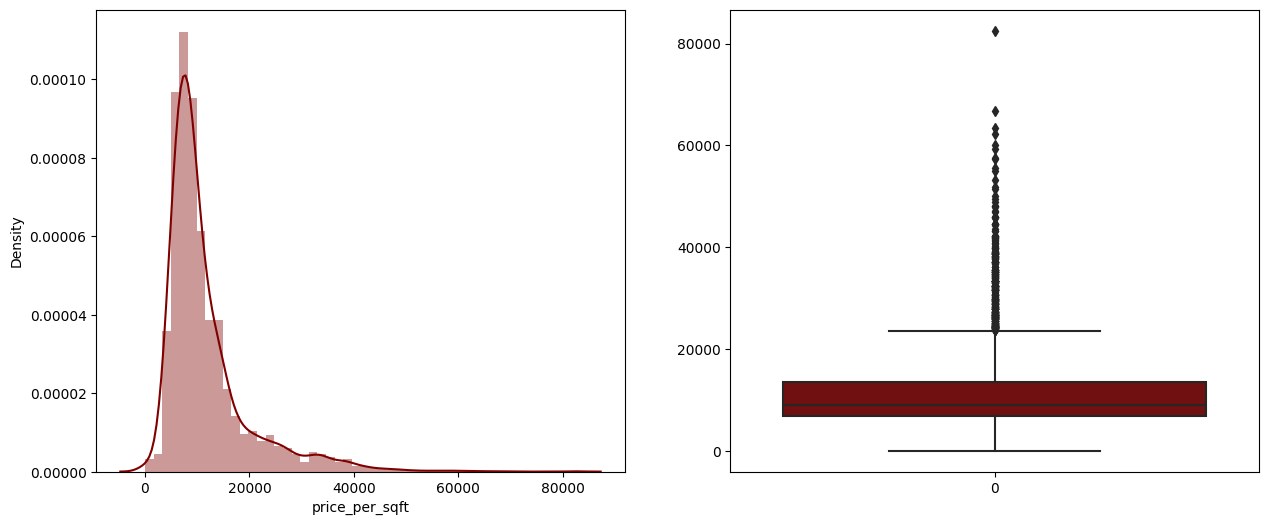

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["price_per_sqft"], ax=ax[0], color="maroon")
sns.boxplot(df['price_per_sqft'], ax=ax[1], color="maroon")

The changes made to the area column helped in addressing the outliers upto certain extent which is evident from the distribution which looks less peaked and the box plot has expanded a bit from the original boxplot.

In [29]:
# LETS ADDRESS OUTLIERS OVER 50000
df[df["price_per_sqft"] > 50000].shape

(13, 23)

In [30]:
# SINCE THESE OUTLIERS OVER 50000 ARE JUST 13 WE CAN GO AHEAD AND EXCLUDE THEM.
df = df[df["price_per_sqft"] <= 50000]

<Axes: >

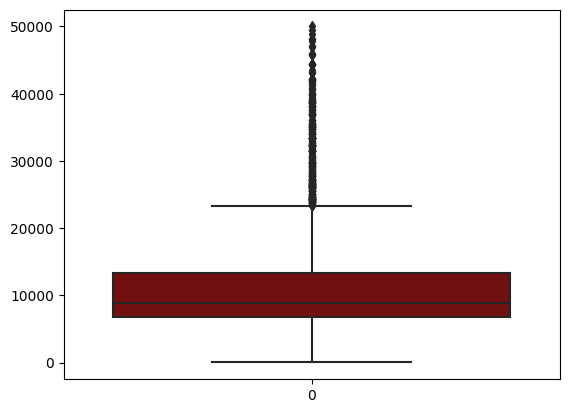

In [31]:
sns.boxplot(df["price_per_sqft"], color="maroon")

Now although we do have outliers, the values are capped to 50000.

AREA COLUMN

<Axes: xlabel='area', ylabel='Density'>

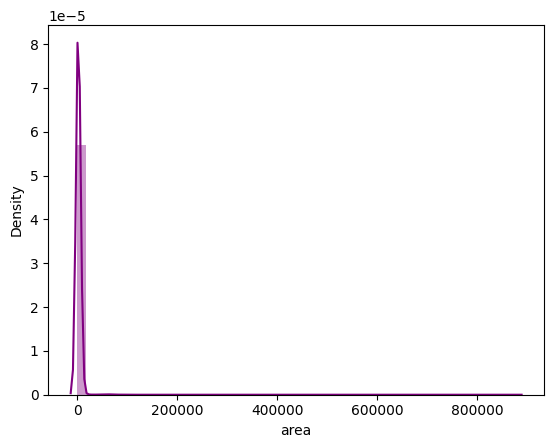

In [32]:
sns.distplot(df["area"], color="purple")

<Axes: >

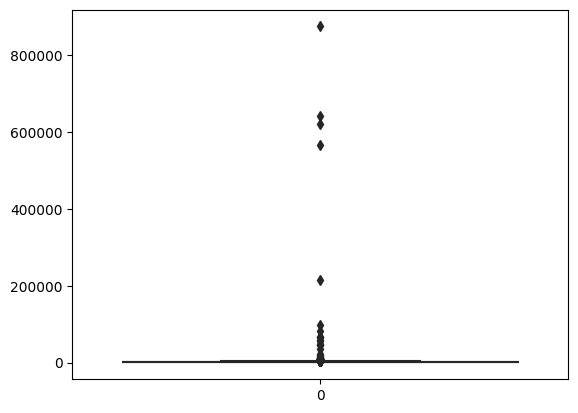

In [33]:
sns.boxplot(df["area"], color="purple")

In [34]:
df["area"].describe()

count      3647.000000
mean       2947.781453
std       23208.192197
min         145.010000
25%        1261.995000
50%        1750.090000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [35]:
# LETS CALCULATE THE IQR AND DENTIFY THE OUTLIERS
Q1_area = df["area"].quantile(0.25)
Q3_area = df["area"].quantile(0.75)

IQR_area = Q3_area - Q1_area
print(f"{IQR}")

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

print(f"Lower bound is {round(lower_bound_area, 2)}")
print(f"Upper bound is {round(upper_bound_area, 2)}")

1.8
Lower bound is -370.01
Upper bound is 3982.01


In [36]:
# OUTLIER DETECTION
outlier_area = df[(df["area"] > upper_bound_area) | (df["area"] < lower_bound_area)]
outlier_area["area"].describe()

count       234.000000
mean      20771.171709
std       89884.011915
min        4000.000000
25%        4517.922500
50%        5022.000000
75%        6869.520000
max      875000.000000
Name: area, dtype: float64

In [37]:
outlier_area.sample(10)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
2167,independent,house,sector 23,5.50,13095.0,4200.08,Plot area 4200(390.19 sq.m.),9,9,3+,...,NaN,4200.0,NaN,1,0,0,0,1,2,0
83,independent,house,sector 47,5.25,11666.0,4500.26,Plot area 1944(180.6 sq.m.)Built Up area: 4650...,9,9,3+,...,NaN,4650.0,4500.0,1,0,0,0,0,2,104
3591,ramsons kshitij,flat,sector 95,0.24,53.0,45283.02,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.0,0,0,0,0,1,0,28
80,ss hibiscus,house,sector 50,12.25,20940.0,5850.05,Plot area 5850(543.48 sq.m.),5,7,3+,...,NaN,5850.0,NaN,1,1,0,1,1,2,122
1882,independent,house,sector 26,20.00,44444.0,4500.05,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,1,1,0,0,0,1,71
1606,pioneer araya,flat,sector 62,9.20,19943.0,4613.15,Super Built up area 4613(428.56 sq.m.)Carpet a...,4,6,3,...,4613.0,NaN,3203.0,1,1,0,0,0,2,123
287,anamika enclave,house,sector 12,6.00,14492.0,4140.22,Plot area 4140(384.62 sq.m.)Built Up area: 900...,9,9,3+,...,NaN,9000.0,NaN,0,0,0,0,0,0,0
3017,dlf city plots,house,sector 26,13.50,29880.0,4518.07,Plot area 502(419.74 sq.m.),5,5,2,...,NaN,4518.0,NaN,1,0,0,1,1,2,90
258,luxury dlf city floors,house,sector 26,20.00,48889.0,4090.90,Plot area 500(418.06 sq.m.),16,16,3+,...,NaN,NaN,NaN,1,0,0,0,0,2,23
133,godrej air,flat,sector 85,2.50,1379.0,18129.08,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,0,1,0,1,1,2,35


Lets examine flats with area more than 100000 sqft. It is not possible for any residential flat to have such a high area. Lets examine the data.

In [39]:
df[df["area"] > 100000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
231,independent,house,sector 50,5.00,232.0,215517.24,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,NaN,NaN,1,1,0,1,1,2,0
1307,hcbs sports ville,flat,sohna road,0.35,4.0,875000.00,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,1,35
2581,ramsons kshitij,flat,sector 95,0.31,5.0,620000.00,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.0,0,0,0,1,1,0,51
3260,signature global solera 2,flat,sector 107,0.51,9.0,566666.67,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,0,35
3669,signature the roselia,flat,sector 95,0.45,7.0,642857.14,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,0,67


This clearly shows there is some problem in the data because of two things:
1. As mentioned earlier the areas above have extreme values and its imposiible for any residential flat to have that area.
2. Although the area are high, the prices assocaited with them are very less as compared to the areas. 
for example = area of 620000 cannot have a price of 0.31 crores (i.e 31 Lakhs INR).
3. This clearly points to data errors.

So we exclude these from our data.

In [40]:
df = df[df["area"] < 100000]
df.sample(5)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
3427,bestech park view spa next,flat,sector 67,2.70,11489.0,2350.07,Super Built up area 2350(218.32 sq.m.),4,4,3+,...,2350.0,NaN,NaN,1,1,0,0,0,2,120
2044,emaar mgf emerald floors premier,flat,sector 65,2.80,16969.0,1650.07,Super Built up area 1650(153.29 sq.m.),3,3,2,...,1650.0,NaN,NaN,1,0,0,0,0,0,83
1985,cancon enclave,flat,sector 4,1.05,7777.0,1350.14,Carpet area: 1350 (125.42 sq.m.),3,2,2,...,NaN,NaN,1350.0,0,0,0,0,0,2,0
2854,independent,house,sector 47,6.09,33665.0,1809.00,Plot area 201(168.06 sq.m.)Built Up area: 180 ...,12,11,3+,...,NaN,180.0,150.0,0,1,0,0,0,1,35
2123,eros rosewood villas,house,sector 49,2.50,13513.0,1850.07,Plot area 1530(142.14 sq.m.)Built Up area: 190...,3,3,2,...,NaN,1900.0,1850.0,0,1,1,0,0,0,50


<Axes: >

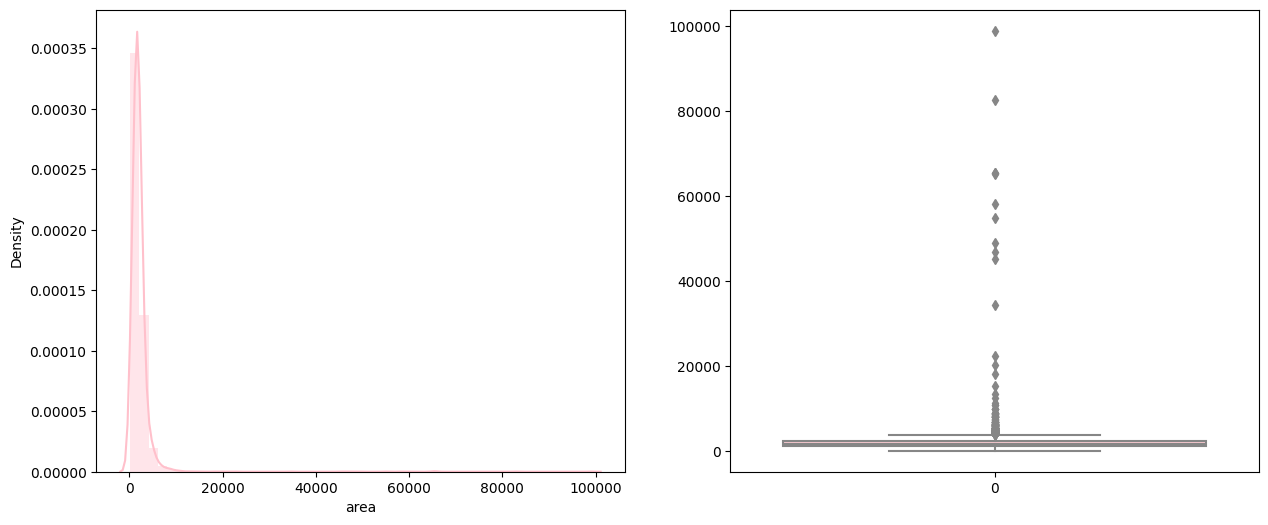

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["area"], ax=ax[0], color="pink")
sns.boxplot(df['area'], ax=ax[1], color="pink")

There is a slight improvement in the distribution and the box plot although there still exists a good amount of outliers.

Now lets look for properties that have areas more than 10000 sqft. Having a 10000 sqft area residential flat is also not a very usual scenario.

In [45]:
df[df["area"] > 10000].sort_values("area", ascending=False)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
298,independent,house,sector 26,18.40,1859.0,98977.95,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.00,1,1,1,0,0,2,46
3203,ganpati heights apartment,house,sector 13,1.25,151.0,82781.46,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,NaN,NaN,0,0,0,0,1,0,7
2425,rof ananda,flat,sector 95,0.38,58.0,65517.24,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,0,51
401,rof ananda,flat,sector 95,0.38,58.0,65517.24,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,0,0,0,1,0,0,15
693,dlf city plot phase 4,house,sector 28,13.00,1992.0,65261.04,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,0,0
3411,pyramid elite,flat,sector 86,0.46,79.0,58227.85,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,0,15
1880,rof ananda,flat,sector 95,0.33,60.0,55000.00,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,0,28
949,signature the serenas,flat,sohna road,0.28,57.0,49122.81,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.00,0,0,0,1,0,0,28
933,independent,house,sector 25,7.30,1560.0,46794.87,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,1,0,1,0,0,2,89
3591,ramsons kshitij,flat,sector 95,0.24,53.0,45283.02,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.00,0,0,0,0,1,0,28


After manually checking each property, the following property indexes do not justify the area and the price:- 298, 2425, 401, 3411, 1880, 949, 3591, 350, 1471

In [46]:
df.drop(index=[298, 2425, 401, 3411, 1880, 949, 3591, 350, 1471], inplace=True)

In [47]:
df[df["area"] > 10000].sort_values("area", ascending=False)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
3203,ganpati heights apartment,house,sector 13,1.25,151.0,82781.46,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,NaN,NaN,0,0,0,0,1,0,7
693,dlf city plot phase 4,house,sector 28,13.00,1992.0,65261.04,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,0,0
933,independent,house,sector 25,7.30,1560.0,46794.87,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,1,0,1,0,0,2,89
2340,independent,house,sector 57,6.25,2778.0,22498.20,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,...,NaN,2660.0,2500.00,1,0,0,0,0,2,52
1278,independent,house,sector 43,5.50,2716.0,20250.37,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,...,NaN,2850.0,2250.00,1,1,0,1,1,2,106
133,godrej air,flat,sector 85,2.50,1379.0,18129.08,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.00,0,1,0,1,1,2,35
3090,unitech aspen greens,house,sector 50,6.95,4490.0,15478.84,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,...,NaN,2160.0,1720.00,1,0,0,0,0,0,122
1243,independent,house,sector 4,0.85,630.0,13492.06,Plot area 1500(1254.19 sq.m.),3,3,1,...,NaN,NaN,NaN,0,0,0,0,1,0,0
3102,godrej icon,flat,sector 88a,1.75,1384.0,12644.51,Carpet area: 1175.11,3,3,3+,...,NaN,NaN,1175.11,0,0,0,0,0,0,55
247,independent,house,sector 43,27.50,24366.0,11286.22,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,2,28


The area for some of these properties is still wrong. We have to fix it with either Carpet area or Builtup area

In [48]:
df.loc[3203, "area"] = 115*9
df.loc[693, "area"] = 7250
df.loc[933, "area"] = 5800
df.loc[2340, "area"] = 2660
df.loc[1278, "area"] = 2850
df.loc[133, "area"] = 1812
df.loc[3090, "area"] = 2160
df.loc[3102, "area"] = 1175
df.loc[2822, "area"] = 3500

<Axes: >

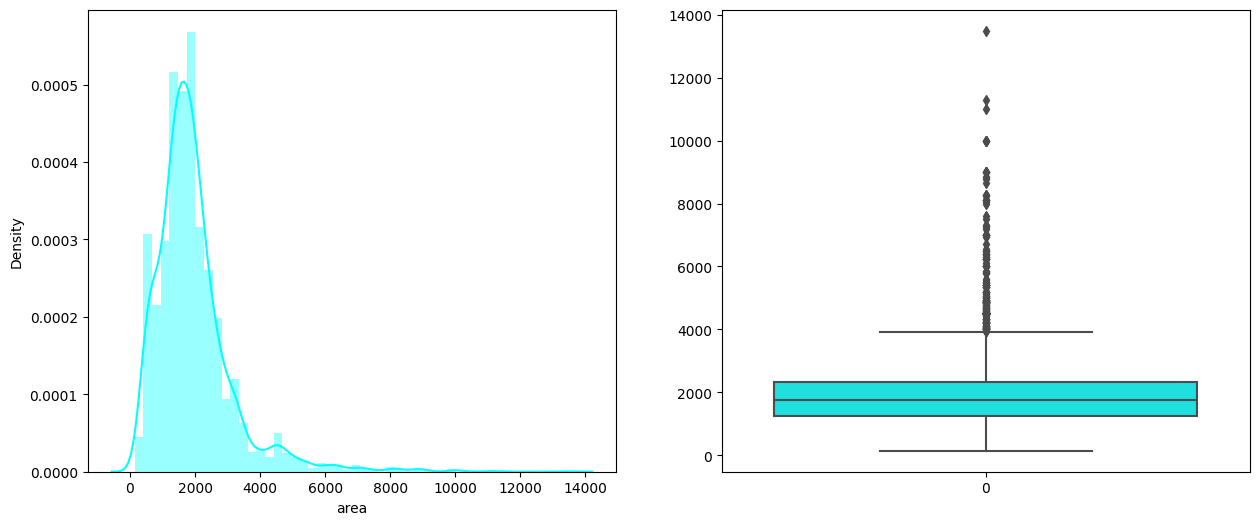

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["area"], ax=ax[0], color="aqua")
sns.boxplot(df['area'], ax=ax[1], color="aqua")

Now the distribution and the box plot looks bit more improved. There are still outliers but they are not data errors and hence we cannot delete them. They are actual propert values although on a higher side.

In [50]:
df["area"].describe()

count     3633.000000
mean      1951.418935
std       1222.148929
min        145.010000
25%       1260.050000
50%       1747.040000
75%       2325.290000
max      13492.060000
Name: area, dtype: float64

BEDROOM COLUMN

<Axes: xlabel='bedRoom', ylabel='Density'>

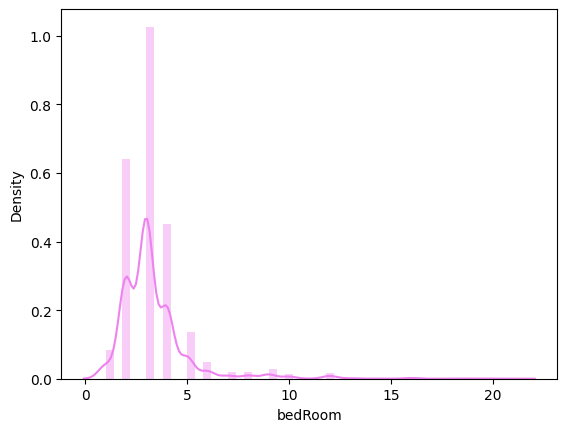

In [51]:
sns.distplot(df["bedRoom"], color="violet")

<Axes: >

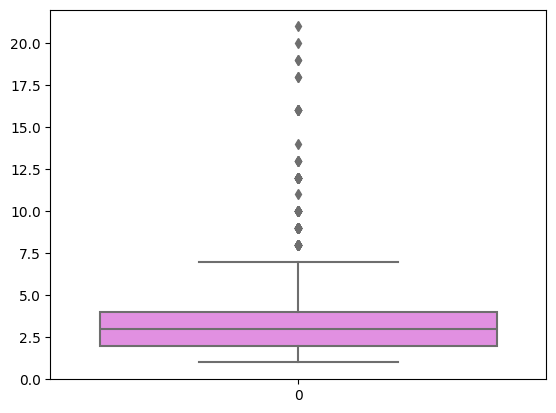

In [52]:
sns.boxplot(df["bedRoom"], color="violet")

In [53]:
df["bedRoom"].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [55]:
df[df["bedRoom"] > 10].sort_values("bedRoom", ascending=True)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
1826,independent,house,sector 43,2.25,7500.0,3000.00,Plot area 550(51.1 sq.m.)Built Up area: 3000 s...,11,11,3+,...,NaN,3000.0,NaN,0,0,0,0,1,1,28
3783,luxury dlf city floors,house,sector 26,8.25,45833.0,1800.01,Plot area 200(167.23 sq.m.),12,12,3+,...,NaN,1800.0,NaN,1,0,0,0,0,2,84
2623,independent house sector 45,house,sector 40,9.00,38022.0,2367.05,Plot area 2367(219.9 sq.m.)Built Up area: 9000...,12,12,3,...,NaN,9000.0,6000.0,1,0,0,0,0,2,53
2564,floor wise designer kothi,house,sector 25,13.00,48148.0,2700.01,Plot area 300(250.84 sq.m.),12,16,3+,...,NaN,2700.0,NaN,1,1,1,1,0,2,114
2498,independent,house,sector 40,9.50,40135.0,2367.01,Plot area 263(219.9 sq.m.),12,12,3+,...,NaN,2367.0,NaN,0,0,1,0,0,2,36
2464,independent,house,sector 27,8.25,45833.0,1800.01,Plot area 210(175.59 sq.m.)Built Up area: 205 ...,12,12,3+,...,NaN,205.0,200.0,1,1,0,0,0,2,35
2399,uppal southend,house,sector 49,6.75,31915.0,2114.99,Plot area 235(196.49 sq.m.),12,12,3+,...,NaN,2115.0,NaN,0,0,0,0,1,0,35
2223,independent,house,sector 56,11.95,43534.0,2744.98,Plot area 305(255.02 sq.m.),12,12,3+,...,NaN,2745.0,NaN,1,0,0,0,0,2,21
2220,independent,house,sector 56,11.50,42032.0,2736.01,Plot area 304(254.18 sq.m.),12,13,3+,...,NaN,2736.0,NaN,1,1,0,1,0,2,35
3724,independent,house,sector 43,2.20,6875.0,3200.00,Plot area 3200(297.29 sq.m.),12,12,3+,...,NaN,3200.0,NaN,1,0,0,0,0,1,42


In [56]:
# KEEPING THE BEDRROM TILL 10 BEDROOMS
df = df[df["bedRoom"] <= 10]
df.shape

(3588, 23)

<Axes: >

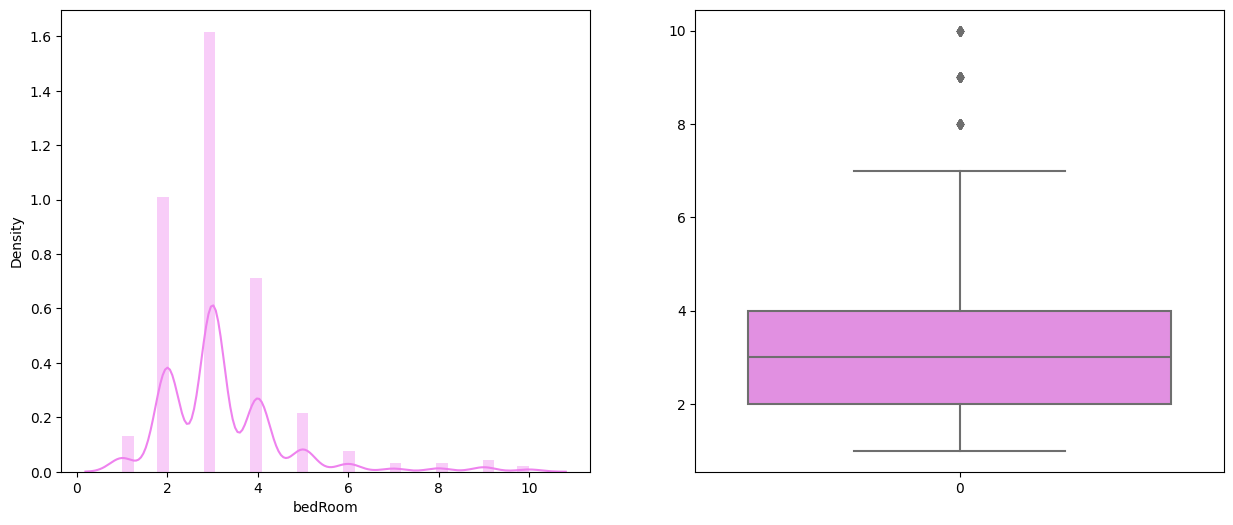

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["bedRoom"], ax=ax[0], color="violet")
sns.boxplot(df['bedRoom'], ax=ax[1], color="violet")

BATHROOM COLUMN

In [58]:
df["bathroom"].describe()

count    3588.000000
mean        3.272854
std         1.455585
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

<Axes: >

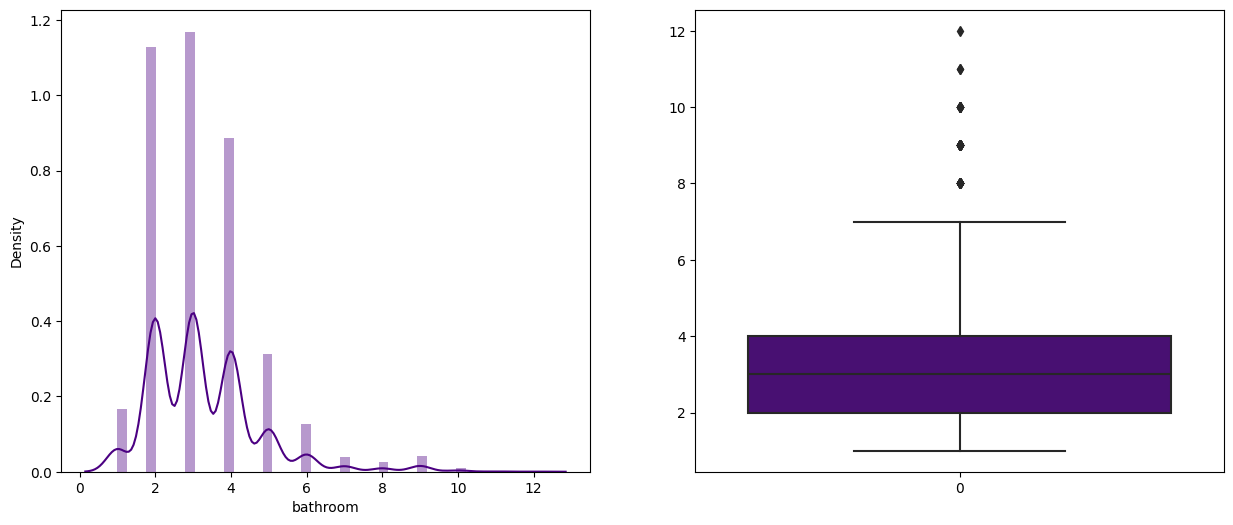

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["bathroom"], ax=ax[0], color="indigo")
sns.boxplot(df['bathroom'], ax=ax[1], color="indigo")

In [60]:
df[df["bathroom"] > 10]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
992,independent,house,sector 24,11.00,28898.0,3806.49,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,...,NaN,5000.0,NaN,1,1,0,1,1,2,30
1348,independent,house,sector 39,7.00,10000.0,7000.00,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,...,NaN,7000.0,NaN,0,1,0,0,0,2,29
1851,adani brahma samsara,house,sector 60,18.02,28200.0,6390.07,Built Up area: 6390 (593.65 sq.m.),9,12,3+,...,NaN,6390.0,NaN,1,0,0,0,0,2,108


All the three properties look logical as the bathroom number justifies the number of bedroom in that particular property.

SUPER BUILTUP AREA

In [61]:
df["super_built_up_area"].describe()

count     1874.000000
mean      1924.906910
std        764.241918
min         89.000000
25%       1479.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: >

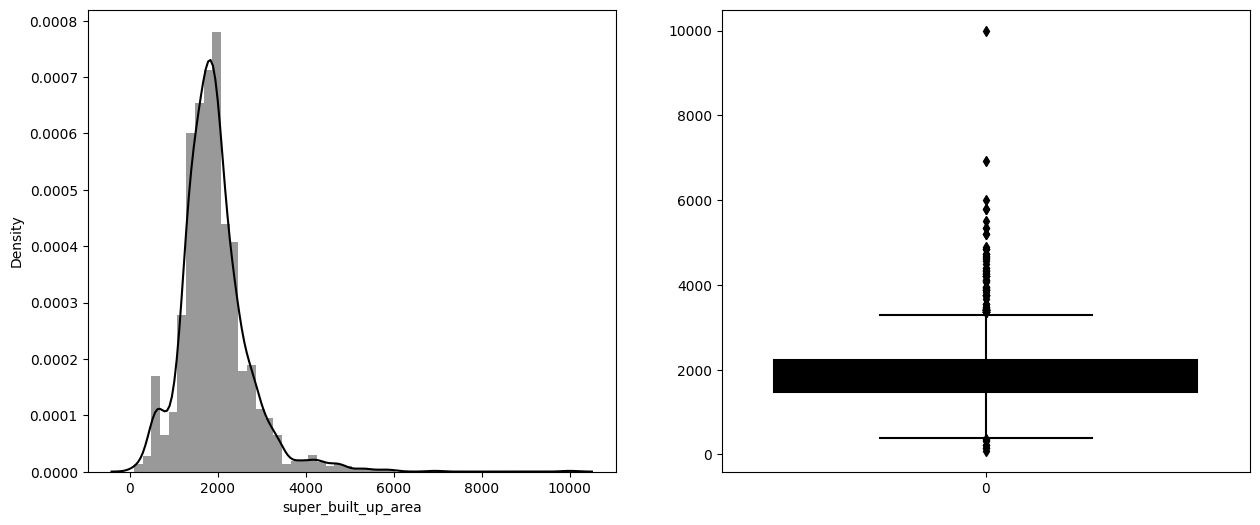

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["super_built_up_area"], ax=ax[0], color="black")
sns.boxplot(df['super_built_up_area'], ax=ax[1], color="black")

In [64]:
# LOOKING FOR PROPERTIES WITH SUPER BUILTUP AREA MORE THAN 6000 SQFT
df[df["super_built_up_area"] > 6000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
47,krrish provence estate,flat,gwal pahari,7.5,7500.0,10000.00,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,1,1,0,0,1,0,35
3324,bestech park view grand spa,flat,sector 81,4.7,6786.0,6926.02,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,1,0,0,0,0,2,107


The above outliers justify their existence.

BUILTUP AREA

In [65]:
df["built_up_area"].describe()

count     1568.000000
mean      1944.811243
std       1382.571381
min         30.000000
25%       1150.000000
50%       1650.000000
75%       2367.000000
max      11286.000000
Name: built_up_area, dtype: float64

<Axes: >

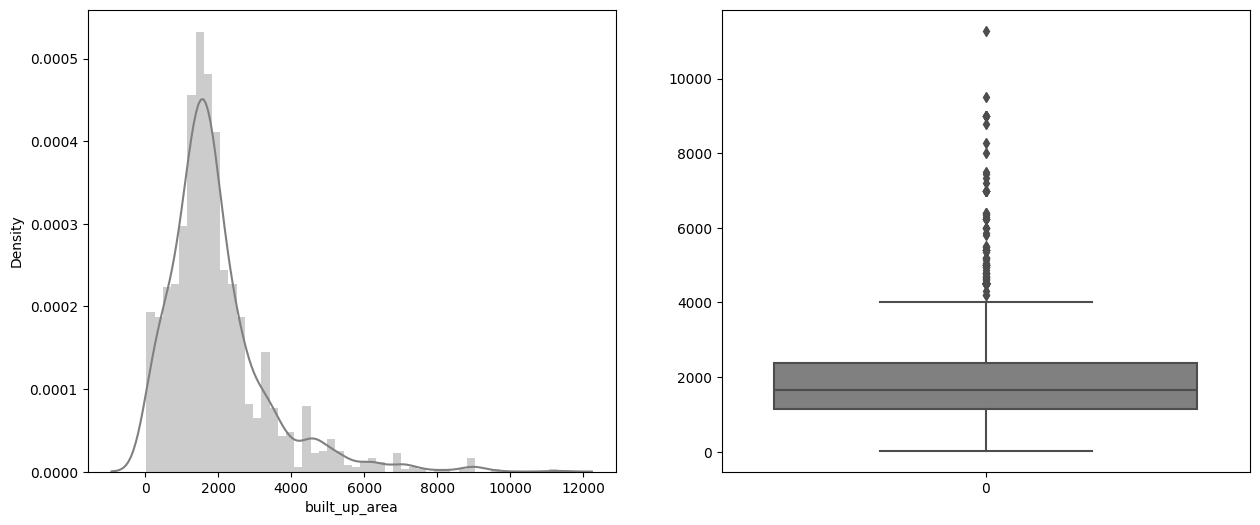

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["built_up_area"], ax=ax[0], color="grey")
sns.boxplot(df['built_up_area'], ax=ax[1], color="grey")

In [67]:
# LOOKING FOR OUTLIERS WITH BUILTUP AREA MORE THAN 10000 SQFT
df[df["built_up_area"] > 10000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
247,independent,house,sector 43,27.5,24366.0,11286.22,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,2,28


CARPET AREA

In [68]:
df["carpet_area"].describe()

count     1850.000000
mean      1433.470204
std       1041.839596
min         15.000000
25%        845.000000
50%       1300.000000
75%       1764.797500
max      18122.000000
Name: carpet_area, dtype: float64

<Axes: >

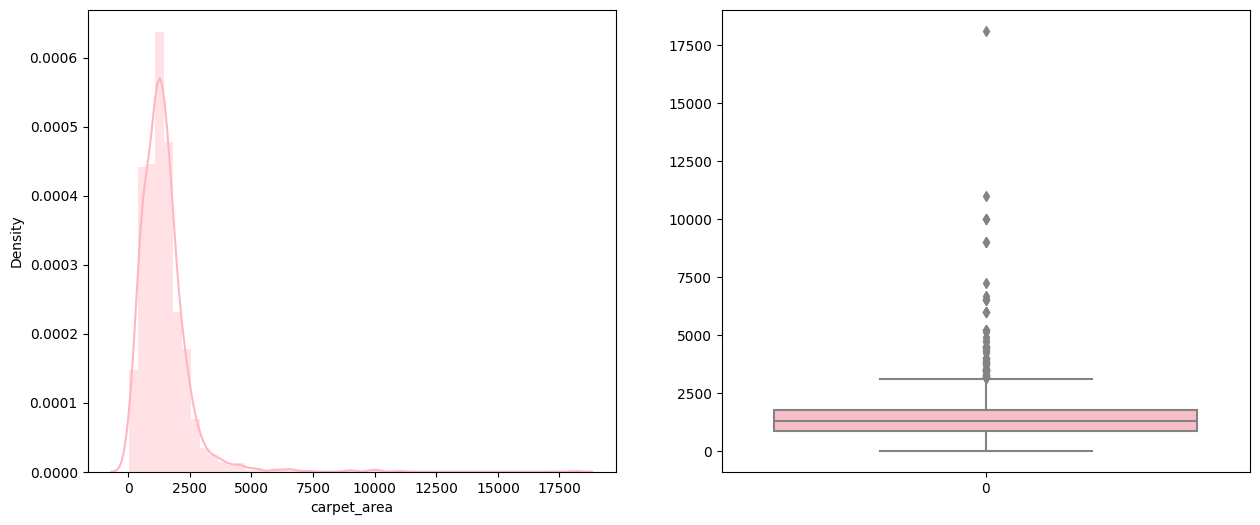

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["carpet_area"], ax=ax[0], color="lightpink")
sns.boxplot(df['carpet_area'], ax=ax[1], color="lightpink")

In [72]:
# LOOKING FOR PROPERTIES WITH CARPET AREA MORE THAN 10000 SQFT
df[df['carpet_area'] > 10000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
133,godrej air,flat,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,0,1,0,1,1,2,35
3463,m3m golfestate,flat,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,1,0,0,0,0,0,45


In [73]:
df.loc[133, "carpet_area"] = 1812

In [74]:
df[df['carpet_area'] > 10000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
3463,m3m golfestate,flat,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,1,0,0,0,0,0,45


LUXURY SCORE COLUMN

In [75]:
df["luxury_score"].describe()

count    3588.000000
mean       55.838350
std        41.868574
min         0.000000
25%        23.000000
50%        45.000000
75%        85.000000
max       136.000000
Name: luxury_score, dtype: float64

<Axes: >

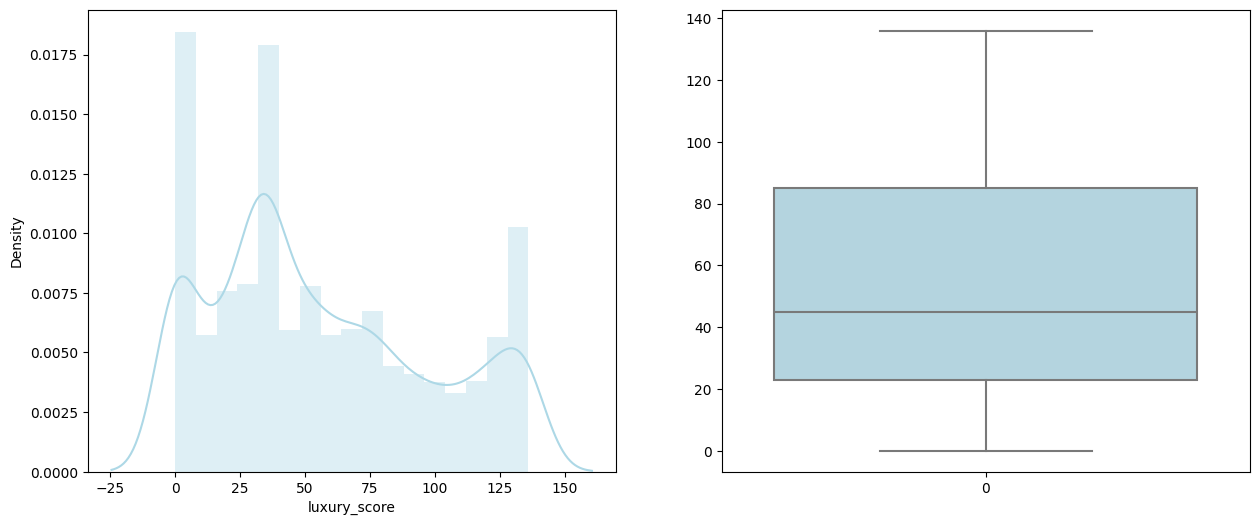

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["luxury_score"], ax=ax[0], color="lightblue")
sns.boxplot(df['luxury_score'], ax=ax[1], color="lightblue")

No Outliers

Lets re calculate price_per_sqft column as we made few changes to the area column in the last few steps. So this might reflect changes in price_per_sqft

In [78]:
df["price_per_sqft"] = round((df['price']*10000000)/df['area'])

<Axes: >

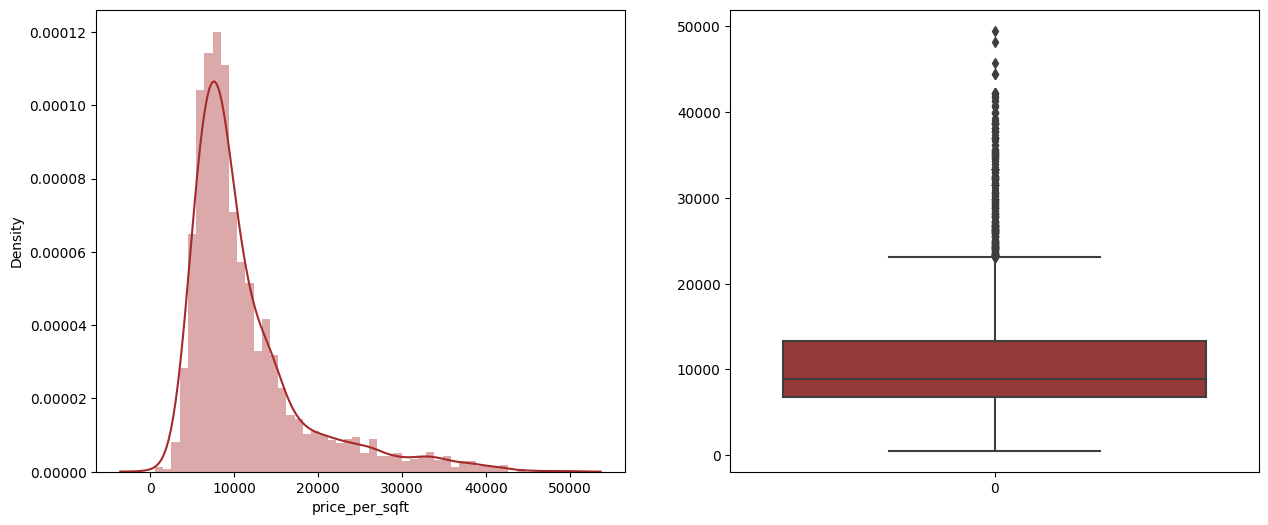

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["price_per_sqft"], ax=ax[0], color="brown")
sns.boxplot(df['price_per_sqft'], ax=ax[1], color="brown")

In [80]:
# THERE APPEARS FEW EXTREME OUTLIERS WITH PRICE_PER_SQFT MORE THAN 40000
df[df["price_per_sqft"] > 42000] 

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
471,independent,house,sector 43,9.5,42222.0,2250.01,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,...,NaN,300.0,250.0,1,1,0,0,0,2,66
761,independent,house,sector 55,5.0,44444.0,1125.01,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,...,NaN,115.0,100.0,0,0,0,0,1,2,35
828,sushant lok 1 builder floors,house,sector 43,13.0,48148.0,2700.01,Plot area 300(250.84 sq.m.),3,3,3+,...,NaN,2700.0,NaN,0,1,0,0,0,2,7
971,independent,house,sector 105,9.9,49500.0,2000.00,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,...,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1595,dlf city plots,house,sector 26,19.0,42054.0,4518.00,Plot area 502(419.74 sq.m.),6,6,3,...,NaN,4518.0,NaN,1,0,0,1,0,2,90
1882,independent,house,sector 26,20.0,44444.0,4500.05,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,1,1,0,0,0,1,71
2360,independent,house,sector 26,19.0,42222.0,4500.02,Plot area 500(418.06 sq.m.),6,8,3+,...,NaN,4500.0,NaN,1,1,1,1,0,2,82
2813,independent,house,sector 25,13.0,45710.0,2844.02,Plot area 316(264.22 sq.m.),6,8,3+,...,NaN,2844.0,NaN,1,1,1,1,0,1,0
3468,independent,house,sector 28,12.0,42194.0,2844.01,Plot area 316(264.22 sq.m.),4,5,3+,...,NaN,2844.0,NaN,1,1,1,0,0,2,46


Now, if we observe carefully there are some data points that look fishy. The number of room in comparision to the area of the house is not making sense. For example = 1125 sqft flat has 9 rooms. which is not ppossible as the rooms will be very small. You cannot fit 9 bedrooms in a 1125 sqft flat. We need to inspect such data points. They can be potential outliers.

In [83]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.525

In [85]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
2613,sector 38 rwa,house,sector 38,4.30,28782.0,1493.99,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,...,NaN,165.0,164.0,0,1,0,0,1,2,27
2712,pivotal devaan,flat,sector 84,0.34,7039.0,483.02,Carpet area: 483 (44.87 sq.m.),2,2,1,...,NaN,NaN,483.0,0,0,1,0,0,2,67
597,iffco nagar and 17b rwa,house,sector 17,2.98,20566.0,1448.99,Plot area 161(134.62 sq.m.),6,6,3+,...,NaN,1449.0,NaN,0,1,0,1,0,0,64
1809,independent,house,sector 41,4.25,26235.0,1619.97,Plot area 180(150.5 sq.m.),10,9,3+,...,NaN,1620.0,NaN,1,0,0,1,0,2,29
269,independent,house,sector 7,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3,1,1,...,NaN,550.0,NaN,0,0,0,0,1,0,22


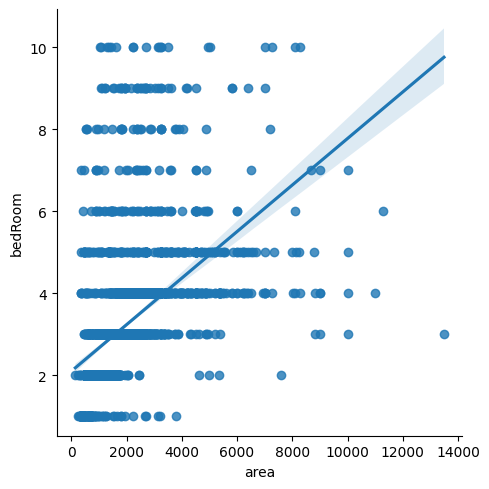

In [87]:
sns.lmplot(data=df, x="area", y="bedRoom")

The potential outliers are the flats with area less than 2000 sqft but room more than 6.

In [88]:
df["area_room_ratio"] = df["area"] / df["bedRoom"]

In [89]:
# LOOKING FOR DATA POINTS WHERE THE RATIO IS LESS THAN 250
df[df["area_room_ratio"] < 250]["bedRoom"].value_counts()

bedRoom
2     47
3     33
5     28
4     17
6     17
9     15
8     12
10     8
7      8
Name: count, dtype: int64

In [90]:
# WE ARE GOING TO REMOVE THE DATA POINTS WITH RATIO LESS THAN 100 BEACUSE THAT MAKES ABSOLUTELY NO SENSE. THE ARE CLEAR OUTLIERS
df = df[df["area_room_ratio"] > 100]

In [91]:
outlier_df = df[(df["area_room_ratio"] < 250) & (df["bedRoom"] > 3)]

In [92]:
outlier_df["bedRoom"] = round(outlier_df["bedRoom"] / outlier_df["floorNum"])

In [93]:
df.update(outlier_df)

In [94]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

In [95]:
df[(df["area_room_ratio"] < 250) & (df["bedRoom"] > 4)]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio
60,independent,house,sector 11,3.50,15555.0,2250.08,Built Up area: 2250 (209.03 sq.m.),10,1,0,...,2250.0,NaN,0,0,0,0,0,0,0,225.008000
104,shivpuri,house,sector 7,2.80,12444.0,2250.08,Plot area 2250(209.03 sq.m.),10,7,3,...,2250.0,NaN,1,1,0,1,1,2,0,225.008000
671,independent,house,manesar,1.10,6172.0,1782.24,Plot area 1782(165.55 sq.m.),8,8,0,...,1782.0,NaN,0,0,0,0,0,0,0,222.780000
713,independent,house,sector 3 phase 2,0.85,9444.0,900.04,Carpet area: 900 (83.61 sq.m.),5,3,3,...,NaN,900.0,0,0,0,0,0,0,0,180.008000
744,"bhim nagar, sector 6",house,sector 6,0.85,14096.0,603.00,Plot area 67(6.22 sq.m.),5,2,2,...,67.0,NaN,0,1,0,0,0,0,29,120.600000
1209,independent,house,sector 105,1.10,12222.0,900.02,Carpet area: 900 (83.61 sq.m.),6,4,1,...,NaN,900.0,0,0,0,0,0,0,0,150.003333
1384,independent,house,manesar,0.80,6666.0,1200.12,Plot area 1200(111.48 sq.m.),8,8,2,...,1200.0,NaN,0,0,0,0,0,0,0,150.015000
1742,independent,house,sector 3 phase 2,1.10,10000.0,1100.00,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,...,1100.0,900.0,0,0,0,0,0,0,0,220.000000
2437,independent,house,sector 17,0.32,5664.0,564.97,Built Up area: 565 (52.49 sq.m.),5,1,0,...,565.0,NaN,0,0,0,0,0,0,0,112.994000
2774,independent,house,sector 7,1.16,11717.0,990.01,Carpet area: 110 (91.97 sq.m.),5,4,2,...,NaN,110.0,0,0,0,0,0,0,0,198.002000


We are going to exclude these data points are their scenario is really hard to imagine and cannot be true. 

In [96]:
df = df[~((df["area_room_ratio"] < 250) & (df["bedRoom"] > 4))]

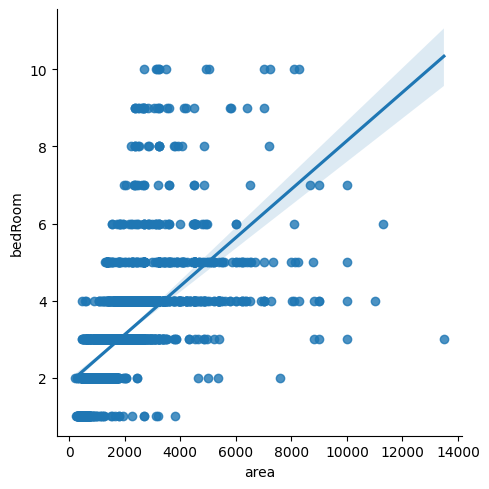

In [97]:
sns.lmplot(data=df, x="area", y="bedRoom")

In [98]:
df.shape

(3555, 24)

In [99]:
from pathlib import Path 

curr_dir = Path("/Users/siddhant/housepriceproject/Capstone/notebooks/feature-engineering.ipynb")
home_dir = curr_dir.parent.parent.parent
destination_dir = home_dir / 'Capstone' / 'data' / 'processed'

destination_dir.mkdir(parents=True, exist_ok=True)

filename = "properties_outlier_treatment.csv"
filepath = destination_dir / filename

df.to_csv(filepath, index=False)